In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tomlkit

from pathlib import Path

# plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.figsize"] = [6, 4.5]
plt.rcParams["figure.dpi"] = 100 # 200 e.g. is really fine, but slower

#### Constants

In [2]:
spy = 365.0 * 86400.0

#### Load species list

In [3]:
with open("naunet_config.toml") as config:
    content = tomlkit.loads(config.read())

summary = content["summary"]
cur_species = summary["list_of_species"]
cur_nspec = summary["num_of_species"]

In [4]:
refpath = Path("/scratch/cjhsu/walsh")
data = np.fromfile(refpath / "test_output.bin")

ref_species = np.genfromtxt(refpath / "rate12_complex_atomic.specs", usecols=1, dtype=str)
ref_nspec = len(ref_species) + 1 # include electron

#### Time evolution of species

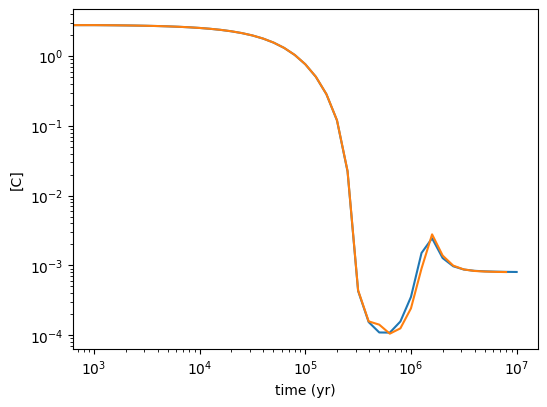

In [5]:
spec = "C"

bindata = np.fromfile(f"build/tests/evolution_singlegrid.bin", dtype="float64").reshape(-1, cur_nspec+1)
cur_time = bindata[:, 0]
cur_sidx = cur_species.index(spec) + 1
cur_data = bindata[:, cur_sidx]

ref_time = np.loadtxt(refpath / "test_input.dat")[:, -1]
ref_time = np.append(0.0, ref_time)
# ref_ntime = len(time)
ref_nH = np.loadtxt(refpath / "test_input.dat")[0, 2]

alldata = data.reshape(-1, ref_nspec)
ref_sidx, = np.where(ref_species == spec)
ref_data = alldata[:, ref_sidx] * ref_nH

fig, ax = plt.subplots(facecolor="w")
ax.plot(cur_time, cur_data);
ax.plot(ref_time / spy, ref_data);
ax.set_xscale("log");
ax.set_yscale("log");
ax.set_xlabel("time (yr)");
ax.set_ylabel(f"[{spec}]");
# plt.savefig("H2evolve.png")

#### Performance

Time consumption ratio:  2.944464388970819


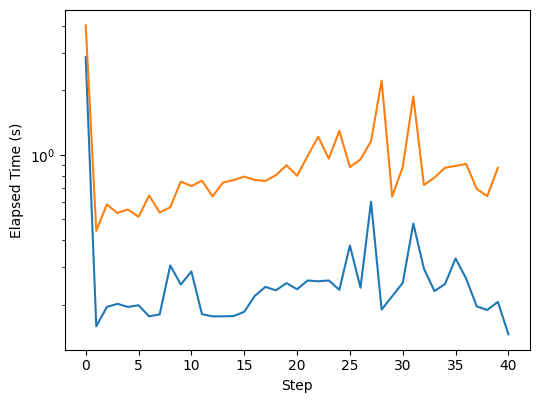

In [8]:
ref_perftime = np.loadtxt(refpath / "time.dat")
cur_perftime = np.loadtxt("build_intel/tests/time_singlegrid.txt")

fig, ax = plt.subplots(facecolor="w")

ax.plot(np.arange(0, len(cur_perftime)), cur_perftime);
ax.plot(np.arange(0, len(ref_perftime)), ref_perftime);

ax.set_yscale("log")
ax.set_xlabel("Step")
ax.set_ylabel("Elapsed Time (s)")

print("Time consumption ratio: ", np.sum(ref_perftime) / np.sum(cur_perftime))

#### Check reaction rates (need turn on reaction rate output, only for debug)

In [7]:
# cov = 10.202240

# cur_rates = np.loadtxt("build/tests/reactionrates.txt")[1, :]
# cur_rates[7070:7616] /= cov
# cur_rates[8273:] /= cov**2

# ref_rates = []
# with open(refpath / "test_rates.dat", "r") as inp:
#     for line in inp.readlines()[4:8768]:
#         ref_rates.append(float(line[79:]))

# fig, ax = plt.subplots(nrows=2, ncols=2)

# ax[0][0].scatter(np.arange(0, 7070), ref_rates[:7070], s=2)
# ax[0][0].scatter(np.arange(0, 7070), cur_rates[:7070], s=2, alpha=0.5)

# ax[0][1].scatter(np.arange(7070, 7616), ref_rates[7070:7616], s=2)
# ax[0][1].scatter(np.arange(7070, 7616), cur_rates[7070:7616], s=2, alpha=0.5)

# ax[1][0].scatter(np.arange(7616, 8273), ref_rates[7616:8273], s=2)
# ax[1][0].scatter(np.arange(7616, 8273), cur_rates[7616:8273], s=2, alpha=0.5)

# ax[1][1].scatter(np.arange(8273, 8764), ref_rates[8273:], s=2)
# ax[1][1].scatter(np.arange(8273, 8764), cur_rates[8273:], s=2, alpha=0.5)
